## Metrics with Naive Forecast

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error

from functions import mape, smape

Naive Forecast

In [5]:
data = pd.read_csv("Binance_ETHUSDT_1h.csv", index_col="date", parse_dates=True).drop(columns=["unix"])
data.head()

,symbol,open,high,low,close,Volume ETH,Volume USDT,tradecount
date,,,,,,,,
11/01/2021 00:00,ETH/USDT,4287.48,4317.88,4276.79,4316.13,6993.6869,30080479.70,15326.0
10/31/2021 23:00,ETH/USDT,4293.01,4302.19,4270.37,4287.21,8875.9914,38058457.82,26672.0
10/31/2021 22:00,ETH/USDT,4306.45,4317.92,4290.75,4293.00,10898.0574,46884132.12,28572.0
10/31/2021 21:00,ETH/USDT,4265.11,4329.46,4262.05,4306.45,15770.7324,67716875.00,55889.0
10/31/2021 20:00,ETH/USDT,4247.81,4271.17,4230.00,4265.11,9617.2065,40952475.61,27900.0


In [6]:
data["NaiveForecast"] = data["close"].shift(1)

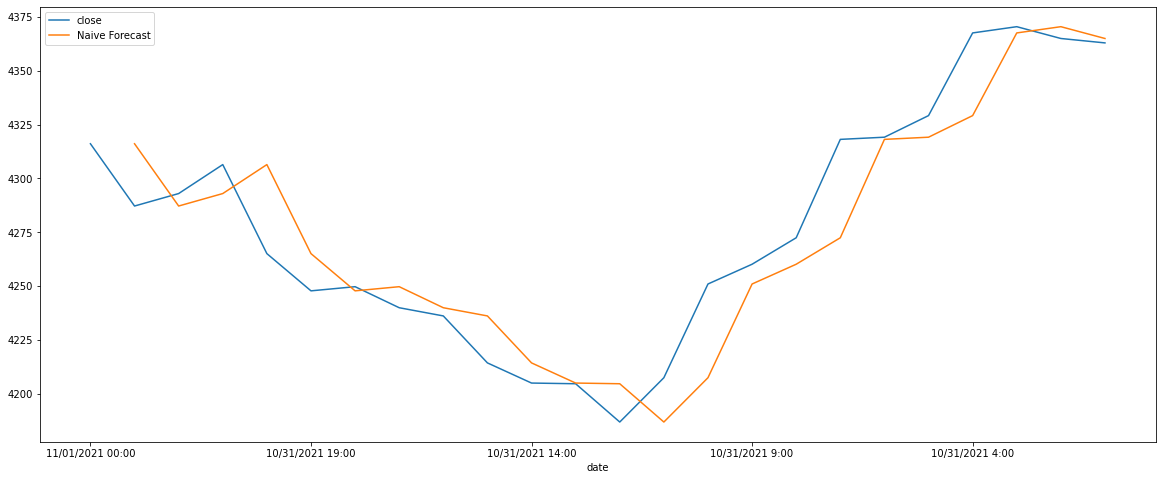

In [7]:
data["close"].iloc[:24].plot(figsize=(20,8), label="close")
data["NaiveForecast"].iloc[:24].plot(figsize=(20,8), label="Naive Forecast")
plt.legend()

In [8]:
y_true = data["close"].iloc[1:24]
y_pred = data["NaiveForecast"].iloc[1:24]

1) Sum of Squared Error (SSE)

In [9]:
# dot product of (y_true - y_pred)

sse = (y_true - y_pred).dot(y_true - y_pred)
sse

10310.418500000069

2) Mean Squared Error (MSE)

$$ MSE = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2 $$

In [10]:
def mse (y_true, y_pred):
    sse = (y_true - y_pred).dot(y_true - y_pred)
    return sse/len(y_true)

mse(y_true, y_pred)

448.2790652173943

In [11]:
# from the Sklearn library:

mean_squared_error(y_true, y_pred)

448.27906521739413

3) Root Mean Squared Error (RMSE)

$$ RMSE = \sqrt{\frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2} $$

In [12]:
def rmse (y_true, y_pred):
    return np.sqrt(mse(y_true,y_pred))

rmse(y_true, y_pred)

21.172601758343124

In [13]:
mean_squared_error(y_true, y_pred, squared=False)

21.17260175834312

4) Mean Absolute Error (MAE)

$$ MAE = \frac{1}{N} \sum_{i=1}^N (|y_i - \hat{y}_i|) $$

In [14]:
def mae (y_true, y_pred):
    ae = 0
    for i in range(len(y_true)):
        ae += np.abs(y_true[i] - y_pred[i])
    return ae / len(y_true)

mae(y_true, y_pred)

15.76913043478263

In [15]:
mean_absolute_error(y_true, y_pred)

15.76913043478263

5) $R^2$ Score

$$ R^2 = 1 - \frac{\sum_{i=1}^N (y_i - \hat{y}_i)^2}{\sum_{i=1}^N (y_i - \mu)^2} $$

In [16]:
# R-Squared indicates how much of the variance of the input we can explain by the regression model.

In [17]:
def r2score (y_true, y_pred):
    sst = (y_pred - np.mean(y_true)).dot(y_pred - np.mean(y_true))
    return 1-(sse/sst)

r2score(y_true, y_pred)

0.845283545572047

In [18]:
r2_score(y_true, y_pred)

0.8578714812945544

6) Mean Absolute Percentage Error (MAPE)

$$ MAPE = \frac{1}{N} \sum_{i=1}^N |\frac{y_i - \hat{y}_i}{y_i}| $$

In [19]:
mape(y_true, y_pred)

0.0036883690750019087

In [20]:
mean_absolute_percentage_error(y_true, y_pred)

0.0036883690750019087

7) Symmetric MAPE (sMAPE)

$$ sMAPE = \frac{1}{N} \sum_{i=1}^N \frac{|y_i - \hat{y}_i|}{(|y_i| + |\hat{y}_i|)/2} $$

In [55]:
smape(y_true, y_pred)

0.0036913502304049316

## Warm-Up Exercise

Implement the MAPE and sMAPE functions and compare your results